In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score               

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_csv("/Life Expectancy Data.csv")
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [3]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<Axes: >

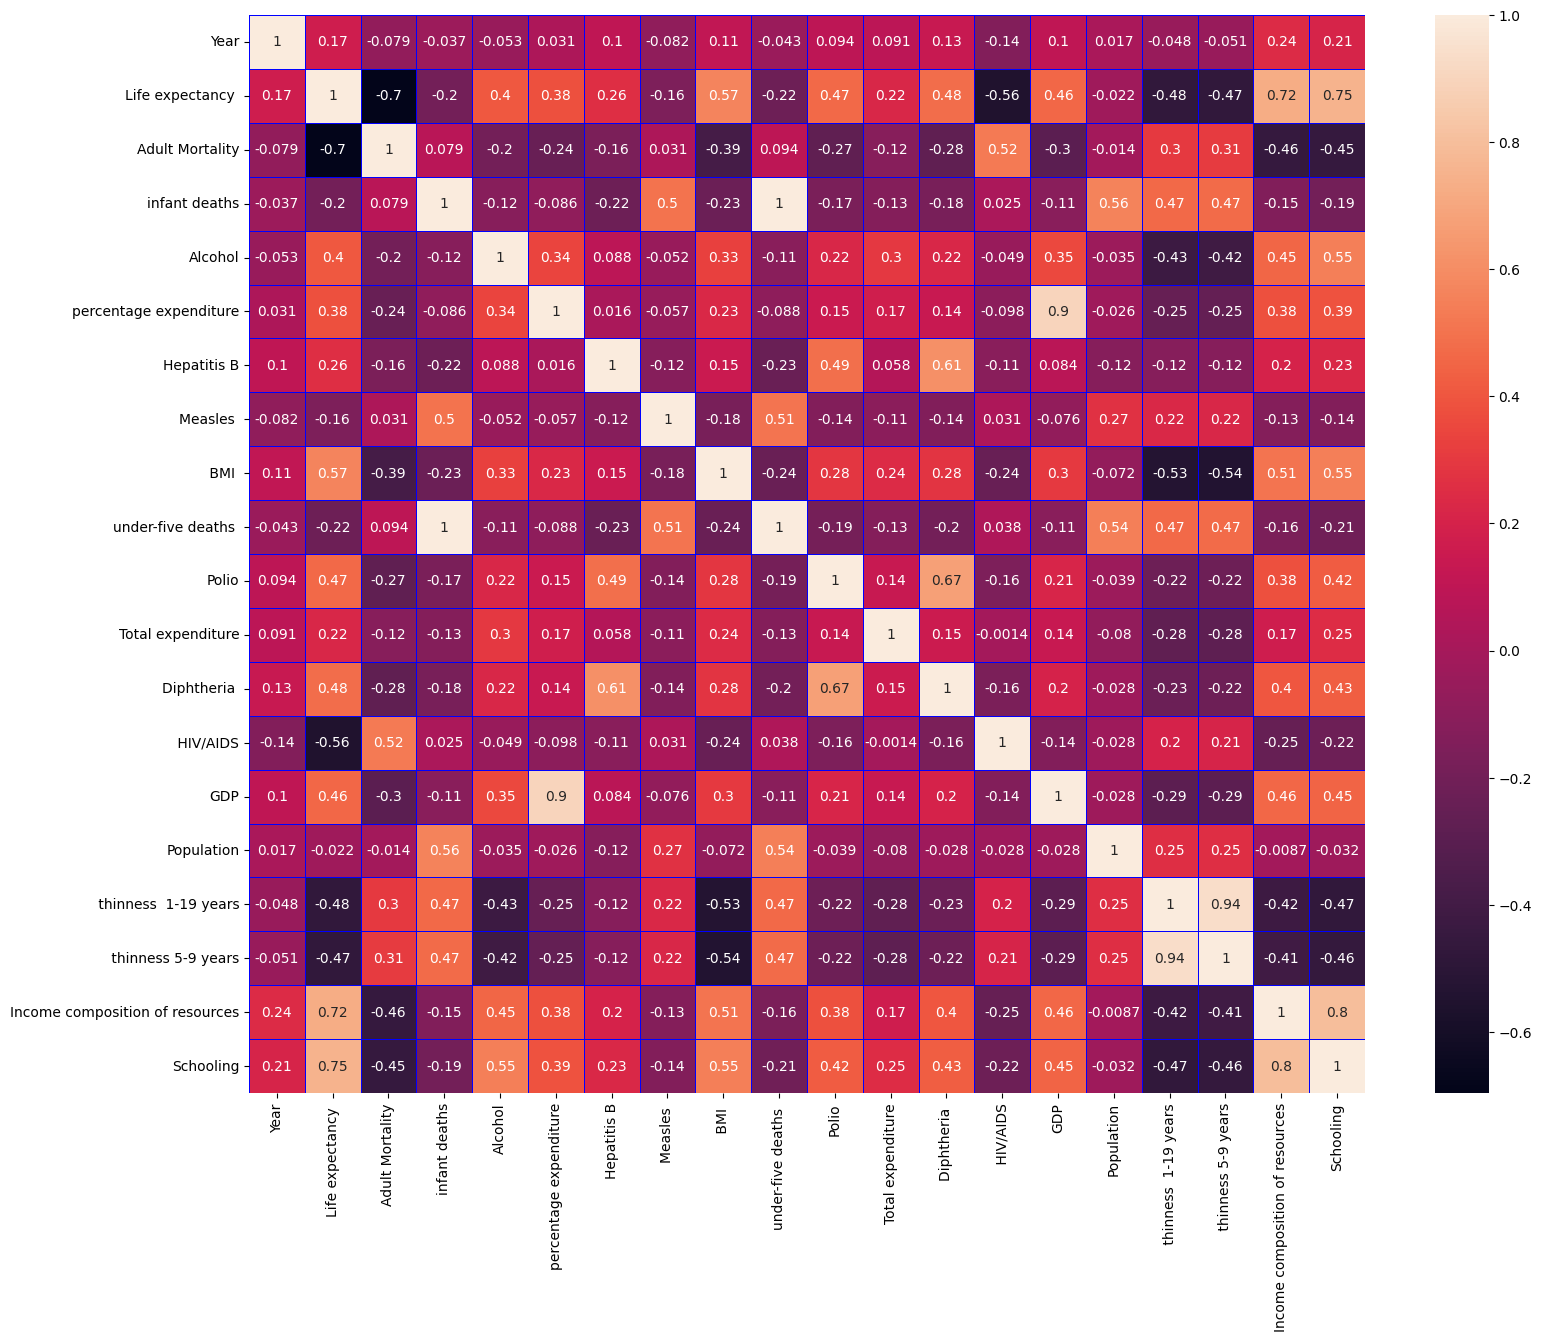

In [4]:
correlation = df.corr()
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)


In [11]:
data = df.copy()
data=data[['percentage expenditure','GDP']]
data=data.dropna()
data['percentage expenditure']=(data['percentage expenditure']/100)*data['GDP']
data1=data.copy()
data['percentage expenditure']=((data['percentage expenditure']-data['percentage expenditure'].min())/(data['percentage expenditure'].max()-data['percentage expenditure'].min()))
data['GDP']=((data['GDP']-data['GDP'].min())/(data['GDP'].max()-data['GDP'].min()))
data=data.rename(columns={'percentage expenditure':'Expense on HealthCare'})
data1=data1.rename(columns={'percentage expenditure':'Expense on HealthCare'})
data

,Expense on HealthCare,GDP
0,1.921670e-05,0.004889
1,2.078643e-05,0.005127
2,2.134396e-05,0.005287
3,2.416992e-05,0.005608
4,2.080739e-07,0.000519
...,...,...
2933,0.000000e+00,0.003799
2934,0.000000e+00,0.003790
2935,0.000000e+00,0.000467
2936,0.000000e+00,0.004589


In [12]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor               
DTdata = data.copy()
x = DTdata.GDP.values.reshape(-1,1)
y = DTdata['Expense on HealthCare'].values.reshape(-1,1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In [14]:
DT_reg = DecisionTreeRegressor()           # created model
DT_reg.fit(x_train,y_train)   

# fitted model according to train values

DecisionTreeRegressor()

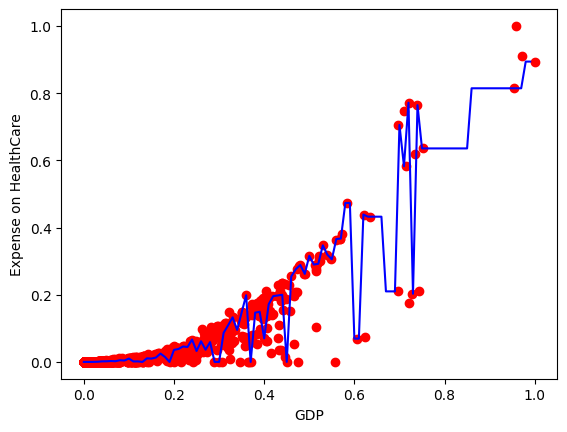

In [19]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)  
# line information to be drawn as a predict
y_head = DT_reg.predict(x_array)   
plt.scatter(x,y, color="red",label='Actual')
plt.plot(x_array,y_head,color="blue",label='Predicted')
plt.xlabel("GDP")
plt.ylabel("Expense on HealthCare")
plt.show()

In [21]:
from sklearn import metrics
y_head = DT_reg.predict(x_test)   
score=metrics.r2_score(y_test,y_head)
print(score)
s1=metrics.mean_squared_error(y_test,y_head)
print(s1)
d = np.sqrt(metrics.mean_squared_error(y_test,y_head))
print(d)

0.8158442012171043
0.0012882981841655034
0.03589287093791054


In [216]:
from sklearn.ensemble import RandomForestRegressor           # for our predict model
RR = data.copy()
x = RR.GDP.values.reshape(-1,1)
y = RR['Expense on HealthCare'].values.reshape(-1,1)

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In [218]:
RF_reg = RandomForestRegressor(n_estimators=100, random_state=42)          
RF_reg.fit(x_train,y_train)                    # fitted model according to train values

RandomForestRegressor(random_state=42)

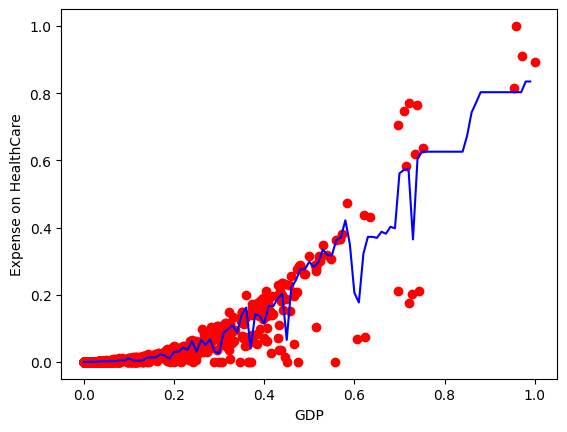

In [219]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = RF_reg.predict(x_array)                        # percentage of spend predict

plt.scatter(x,y, color="red",label='Actual')
plt.plot(x_array,y_head,color="blue",label='Predicted')
plt.xlabel("GDP")
plt.ylabel("Expense on HealthCare")
plt.show()

In [220]:
from sklearn import metrics
y_head = RF_reg.predict(x_test)   
score=metrics.r2_score(y_test,y_head)
print(score)
s1=metrics.mean_squared_error(y_test,y_head)
print(s1)
d = np.sqrt(metrics.mean_squared_error(y_test,y_head))
print(d)

0.8553023709134961
0.0010122607815622612
0.03181604597624069


In [221]:
from sklearn.ensemble import GradientBoostingRegressor
DTdata = data.copy()
x = DTdata.GDP.values.reshape(-1,1)
y = DTdata['Expense on HealthCare'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

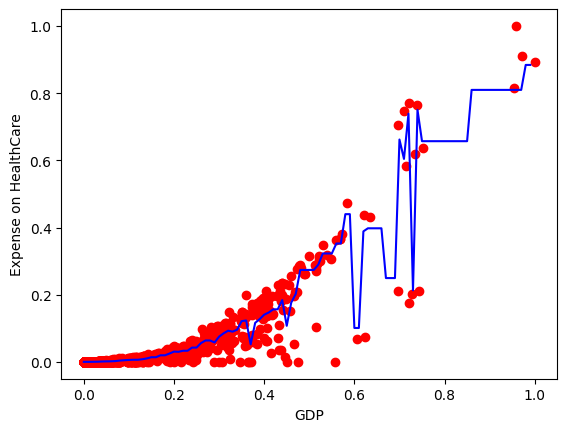

In [222]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = gbr.predict(x_array)                        # percentage of spend predict

plt.scatter(x,y, color="red",label='Actual')
plt.plot(x_array,y_head,color="blue",label='Predicted')
plt.xlabel("GDP")
plt.ylabel("Expense on HealthCare")
plt.show()

In [223]:
from sklearn import metrics
y_head = gbr.predict(x_test)   
score=metrics.r2_score(y_test,y_head)
print(score)
s1=metrics.mean_squared_error(y_test,y_head)
print(s1)
d = np.sqrt(metrics.mean_squared_error(y_test,y_head))
print(d)

0.8417808984641046
0.0011068529069198304
0.03326939895639581


In [224]:
from xgboost import XGBRegressor
DTdata = data.copy()
x = DTdata.GDP.values.reshape(-1,1)
y = DTdata['Expense on HealthCare'].values.reshape(-1,1)


In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
xg_reg = GridSearchCV(XGBRegressor(booster='gbtree', subsample=0.75),
                     param_grid={
                         'min_child_weight': [4, 6, 8],
                         'max_depth': [8, 10, 12],
                         'eta': [0.3, 0.03], 
                         'learning_rate': [0.01, 0.1],
                         'reg_alpha': [0.1, 1, 3],
                         'reg_lambda': [0.1, 1, 2, 3]
                     }, 
                     verbose=3, 
                     cv=3)
xg_reg.fit(X_train,Y_train)
xgb_reg = xg_reg.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-8.341 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-6.158 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-7.851 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-8.369 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-6.186 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-7.886 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, sco

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-8.292 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-8.663 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-6.477 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-8.311 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=-8.681 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=-6.490 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=-8.331 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, 

[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-8.471 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-6.313 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-8.072 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-8.493 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-6.331 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-8.099 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=-8.637 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=-8.011 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-8.420 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-6.288 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-8.066 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-8.440 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-6.306 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-8.091 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-8.314 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-8.320 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-6.163 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-7.877 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=-8.347 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=-6.193 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=-7.909 total time=   0.0s
[CV 1/3] END eta=0.3, learning

[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-6.463 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-8.321 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-8.660 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-6.479 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-8.339 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-8.679 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-6.494 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_de

[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.795 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=0.816 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=0.771 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=0.795 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=0.810 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=0.769 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=0.791 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weigh

[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.757 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.837 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.708 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.759 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.838 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.792 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.776 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_dep

[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=0.789 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.802 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.774 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.788 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.811 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.754 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.779 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth

[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=0.819 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.776 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.778 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.812 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.776 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.780 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.812 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, m

[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=0.766 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=0.822 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=0.762 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=0.767 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=0.820 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=0.761 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=0.766 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_c

[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=2;, score=-8.376 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=2;, score=-6.220 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=2;, score=-7.942 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-8.404 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-6.247 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-7.977 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=-8.415 total time=   0.0s
[CV 2/3] END eta=0.03, learning_ra

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-6.494 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-8.358 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-8.341 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-6.158 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-7.851 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-8.369 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-6.186 total time=   0.0s
[CV 3/3] END eta=0.03, lear

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=-6.336 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=-8.114 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-8.625 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-6.448 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-8.277 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-8.642 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-6.462 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rat

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=-6.277 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=-8.024 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=-8.447 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=-6.293 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=-8.048 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-8.471 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-6.313 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=

[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-7.915 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-8.351 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-6.202 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-7.945 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=-8.377 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=-6.230 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=-7.977 total time=   0.0s
[CV 1/3] END eta=0.03, le

[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.812 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.776 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.780 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.811 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=0.776 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=0.777 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=0.811 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_chi

[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.767 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.815 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.759 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.747 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=0.817 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=0.754 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=0.746 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, m

[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.771 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.794 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.815 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.775 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.795 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=0.816 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=0.771 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth

[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.836 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.702 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.757 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.837 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.708 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.759 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.838 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1,

[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=0.774 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=0.789 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.802 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.774 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.788 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.811 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.754 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_d

In [226]:
y_predict_xg = xgb_reg.predict(X_test)

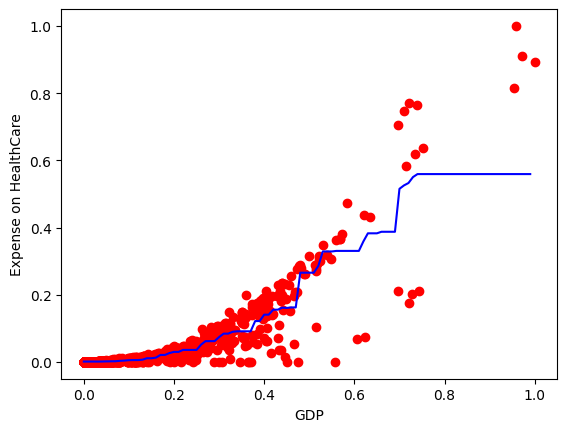

In [227]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = xg_reg.predict(x_array)                        # percentage of spend predict

plt.scatter(x,y, color="red",label='Actual')
plt.plot(x_array,y_head,color="blue",label='Predicted')
plt.xlabel("GDP")
plt.ylabel("Expense on HealthCare")
plt.show()

In [228]:
xg_reg = GridSearchCV(XGBRegressor(booster='gbtree', subsample=0.75),
                     param_grid={
                         'min_child_weight': [4, 6, 8],
                         'max_depth': [8, 10, 12],
                         'eta': [0.3, 0.03], 
                         'learning_rate': [0.01, 0.1],
                         'reg_alpha': [0.1, 1, 3],
                         'reg_lambda': [0.1, 1, 2, 3]
                     }, 
                     verbose=3, 
                     cv=3)
xg_reg.fit(X_train,Y_train)
xgb_reg = xg_reg.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-8.341 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-6.158 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-7.851 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-8.369 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-6.186 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-7.886 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, sco

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-8.277 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-8.642 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-6.462 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-8.292 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-8.663 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-6.477 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-8.311 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8

[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=-8.447 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=-6.293 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=-8.048 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-8.471 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-6.313 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-8.072 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-8.493 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_de

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=-7.977 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=-8.406 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=-6.256 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=-8.011 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-8.420 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-6.288 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-8.066 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rat

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=-8.295 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-8.696 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-6.489 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-8.314 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-8.320 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-6.163 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-7.877 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=-8.117 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=-8.487 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=-6.345 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=-8.144 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=-8.624 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=-6.450 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=-8.305 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, 

[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=0.780 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=0.764 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=0.817 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.816 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.771 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.794 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.815 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min

[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.697 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.756 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.836 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.702 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.757 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.837 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.708 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_dep

[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=0.789 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=0.802 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=0.774 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=0.789 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.802 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.774 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.788 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_chi

[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=0.776 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=0.820 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=0.788 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=0.776 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=0.819 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.776 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.778 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min

[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=0.823 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=0.761 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=0.766 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=0.822 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=0.762 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=0.767 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=0.820 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, m

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=-6.193 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=-7.909 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=2;, score=-8.376 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=2;, score=-6.220 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=2;, score=-7.942 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-8.404 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-6.247 total time=   0.0s
[CV 3/3] END eta=0.03, learning_ra

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-6.463 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-8.321 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-8.660 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-6.479 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-8.339 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-8.679 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-6.494 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_d

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=-6.298 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=-8.061 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=-8.462 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=-6.317 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=-8.089 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=-8.483 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=-6.336 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=-6.216 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=-7.920 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=-8.425 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=-6.241 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=-7.956 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=-8.426 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=-6.277 total time=   0.0s
[CV 3/3] END eta=0.03, lear

[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-8.321 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-6.172 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-7.915 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-8.351 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-6.202 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-7.945 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=-8.377 total time=   0.0s
[CV 2/3] END eta=0.03

[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.812 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.776 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.780 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.812 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.776 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.780 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.811 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_c

[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=0.762 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=0.767 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=0.820 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=0.761 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=0.766 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.824 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.761 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_chi

[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=0.780 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=0.764 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=0.817 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.816 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.771 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.794 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.815 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, m

[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=0.754 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=0.834 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.697 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.756 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.836 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.702 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.757 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=

[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=0.789 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.802 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.774 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.788 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.811 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.754 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.779 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, m

In [229]:
from sklearn import metrics
y_head = xg_reg.predict(x_test)   
score=metrics.r2_score(y_test,y_head)
print(score)
s1=metrics.mean_squared_error(y_test,y_head)
print(s1)
d = np.sqrt(metrics.mean_squared_error(y_test,y_head))
print(d)

0.8075501319475226
0.0013463209803520199
0.036692246869768276


<Axes: >

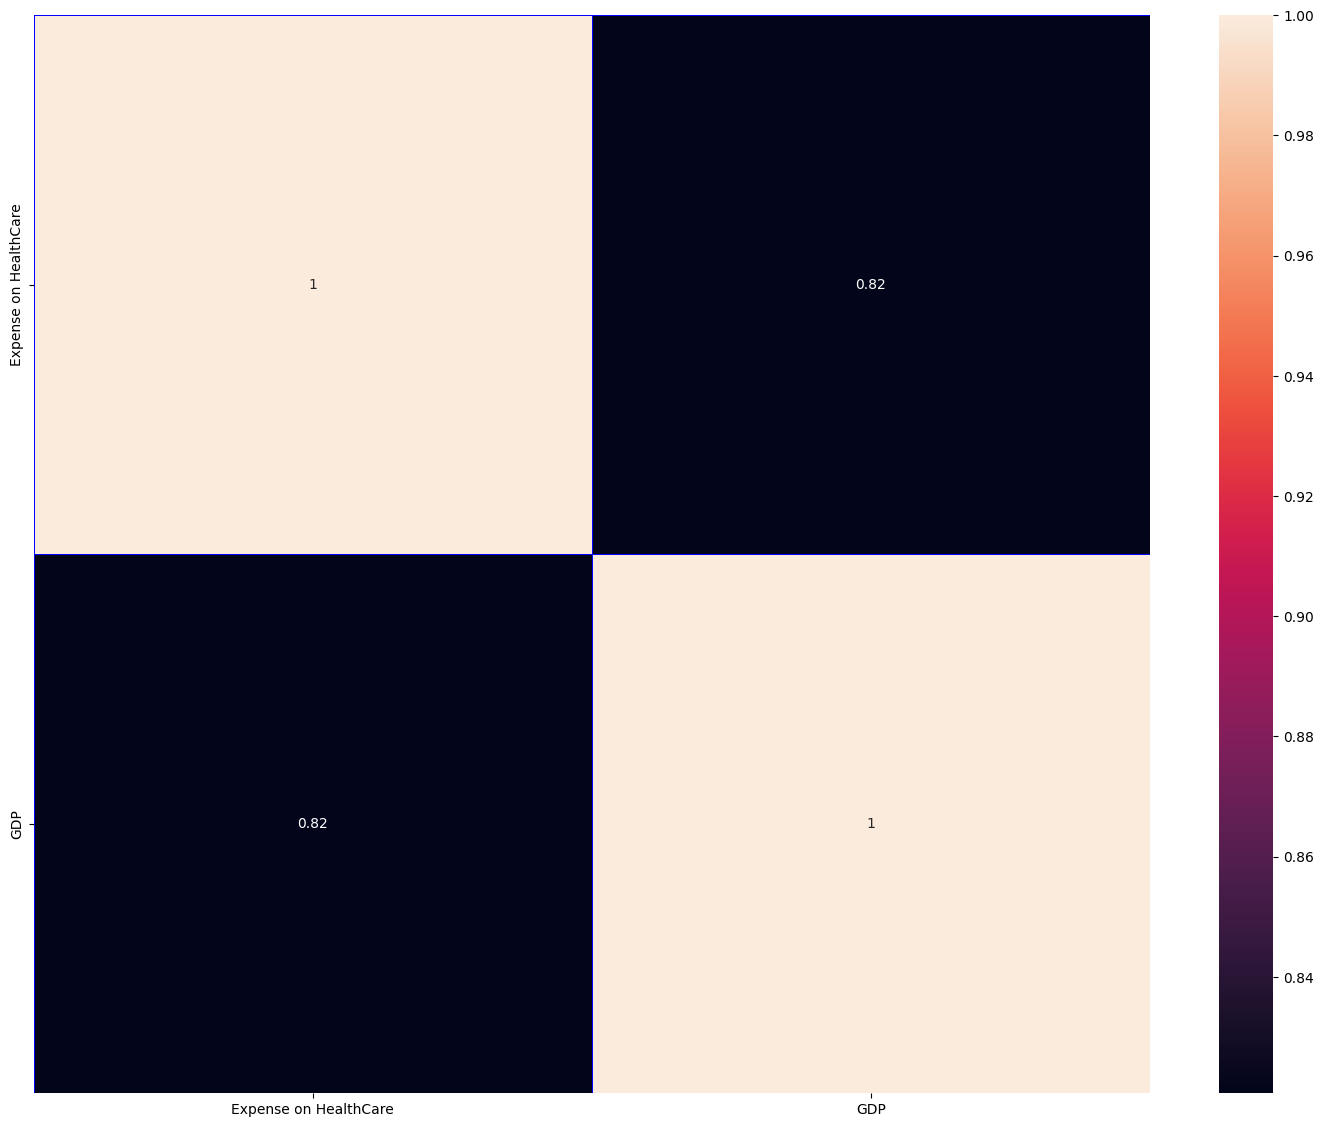

In [230]:
correlation = data.corr()
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [231]:
DTdata = data1.copy()
x = DTdata.GDP.values.reshape(-1,1)
y = DTdata['Expense on HealthCare'].values.reshape(-1,1)

In [204]:
df={'GDP':1000}
data=pd.DataFrame(df,index=[0])
RF_reg1 = RandomForestRegressor(n_estimators=100, random_state=42)          
RF_reg1.fit(x,y)      
new_pred=RF_reg1.predict(data)
print("Medical Expenditure when the GDP is",df['GDP'],"Million USD:",new_pred[0],"Million USD")

Medical Expenditure when the GDP is 1000 Million USD: 704.5222849403359 Million USD
